In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader as web
from scipy import stats
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [30]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [31]:
# SPY ETF: Exchange Traded Fund that follows the S&P500
# Google close is automatically adjusted close
spy_etf = web.DataReader('SPY', 'google', start, end)

In [32]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,112.37,113.39,111.51,113.33,118944541
2010-01-05,113.26,113.68,112.85,113.63,111579866
2010-01-06,113.52,113.99,113.43,113.71,116074402
2010-01-07,113.50,114.33,113.18,114.19,131091048
2010-01-08,113.89,114.62,113.66,114.57,126402764


In [33]:
aapl = web.DataReader('AAPL', 'google', start, end)

In [34]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,30.49,30.64,30.34,30.57,123432050
2010-01-05,30.66,30.80,30.46,30.63,150476004
2010-01-06,30.63,30.75,30.11,30.14,138039594
2010-01-07,30.25,30.29,29.86,30.08,119282324
2010-01-08,30.04,30.29,29.87,30.28,111969081


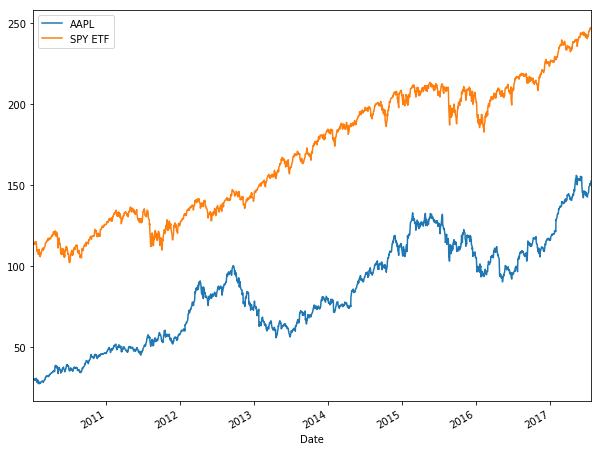

In [35]:
aapl['Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY ETF')
plt.legend();

In [36]:
# Cumulative
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

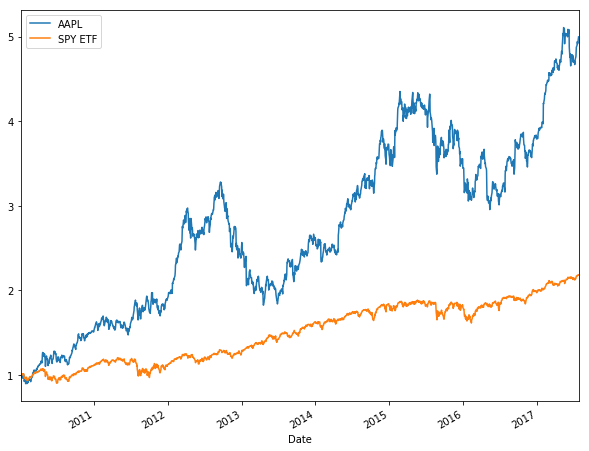

In [37]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY ETF')
plt.legend();

In [38]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

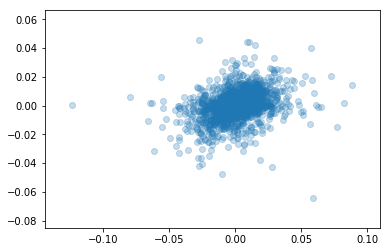

In [40]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [41]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [42]:
print(beta, alpha, r_value, p_value, std_err)

0.194209510285 0.000265897230729 0.331428499205 5.72913392579e-50 0.0126867684914


In [44]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [45]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

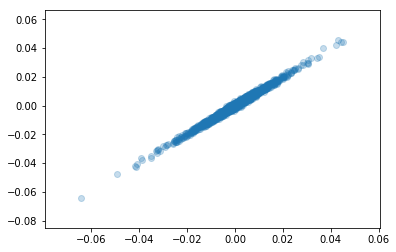

In [46]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [47]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [48]:
print(beta, alpha, r_value, p_value, std_err)

0.991147805848 2.18469318772e-05 0.994449825356 0.0 0.0024063453054
